In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import cluster, covariance,manifold

In [2]:
symbol_dict = {
   'TOT': 'Total',
   'XOM': 'Exxon',
   'CVX': 'Chevron',
   'COP': 'ConocoPhillips',
   'VLO': 'Valero Energy',
   'MSFT': 'Microsoft',
   'IBM': 'IBM',
   'TWX': 'Time Warner',
   'CMCSA': 'Comcast',
   'CVC': 'Cablevision',
   'YHOO': 'Yahoo',
   'DELL': 'Dell',
   'HPQ': 'HP',
   'AMZN': 'Amazon',
   'TM': 'Toyota',
   'CAJ': 'Canon',
   'SNE': 'Sony',
   'F': 'Ford',
   'HMC': 'Honda',
   'NAV': 'Navistar',
   'NOC': 'Northrop Grumman',
   'BA': 'Boeing',
   'KO': 'Coca Cola',
   'MMM': '3M',
   'MCD': 'McDonald\'s',
   'PEP': 'Pepsi',
   'K': 'Kellogg',
   'UN': 'Unilever',
   'MAR': 'Marriott',
   'PG': 'Procter Gamble',
   'CL': 'Colgate-Palmolive',
   'GE': 'General Electrics',
   'WFC': 'Wells Fargo',
   'JPM': 'JPMorgan Chase',
   'AIG': 'AIG',
   'AXP': 'American express',
   'BAC': 'Bank of America',
   'GS': 'Goldman Sachs',
   'AAPL': 'Apple',
   'SAP': 'SAP',
   'CSCO': 'Cisco',
   'TXN': 'Texas Instruments',
   'XRX': 'Xerox',
   'WMT': 'Wal-Mart',
   'HD': 'Home Depot',
   'GSK': 'GlaxoSmithKline',
   'PFE': 'Pfizer',
   'SNY': 'Sanofi-Aventis',
   'NVS': 'Novartis',
   'KMB': 'Kimberly-Clark',
   'R': 'Ryder',
   'GD': 'General Dynamics',
   'RTN': 'Raytheon',
   'CVS': 'CVS',
   'CAT': 'Caterpillar',
   'DD': 'DuPont de Nemours'}
symbols, names = np.array(sorted(symbol_dict.items())).T

In [3]:
quotes = []
for symbol in symbols:
    print('Fetching quote history for %r' % symbol, file=sys.stderr)
    url = ('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Clustering/financial-data/{}.csv')
    quotes.append(pd.read_csv(url.format(symbol)))
    

Fetching quote history for 'AAPL'
Fetching quote history for 'AIG'
Fetching quote history for 'AMZN'
Fetching quote history for 'AXP'
Fetching quote history for 'BA'
Fetching quote history for 'BAC'
Fetching quote history for 'CAJ'
Fetching quote history for 'CAT'
Fetching quote history for 'CL'
Fetching quote history for 'CMCSA'
Fetching quote history for 'COP'
Fetching quote history for 'CSCO'
Fetching quote history for 'CVC'
Fetching quote history for 'CVS'
Fetching quote history for 'CVX'
Fetching quote history for 'DD'
Fetching quote history for 'DELL'
Fetching quote history for 'F'
Fetching quote history for 'GD'
Fetching quote history for 'GE'
Fetching quote history for 'GS'
Fetching quote history for 'GSK'
Fetching quote history for 'HD'
Fetching quote history for 'HMC'
Fetching quote history for 'HPQ'
Fetching quote history for 'IBM'
Fetching quote history for 'JPM'
Fetching quote history for 'K'
Fetching quote history for 'KMB'
Fetching quote history for 'KO'
Fetching quote h

OSError: [WinError 10051] A socket operation was attempted to an unreachable network

In [4]:
close_prices = np.vstack([q['close'] for q in quotes])
open_prices = np.vstack([q['open'] for q in quotes])

In [5]:
variations = open_prices - close_prices

In [6]:
print(variations)

[[-0.44 -0.1   0.13 ...  0.38  0.76  1.42]
 [-2.2  -0.07 -2.02 ...  1.08  0.32 -0.93]
 [-0.38 -0.93 -0.3  ... -1.58  0.82  1.17]
 ...
 [-0.95  1.61  0.01 ...  0.23 -0.14  0.23]
 [-0.47 -0.25 -0.93 ...  1.27 -0.74  0.7 ]
 [-0.07 -0.12 -0.21 ...  0.14 -0.13  0.13]]


In [7]:
edge_model = covariance.GraphicalLassoCV()

In [8]:
X = variations.copy().T

In [9]:
X /= X.std(axis=0)

In [10]:
edge_model.fit(X)

GraphicalLassoCV()

In [11]:
_,labels = cluster.affinity_propagation(edge_model.covariance_,random_state=0)
n_labels = labels.max()

In [12]:
print(n_labels)

9


In [13]:
for i in range(n_labels + 1):
    print('Cluster %i: %s' %((i+1), ', '.join(names[labels==i])))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 56 but corresponding boolean dimension is 55

In [14]:
node_position_model = manifold.LocallyLinearEmbedding(n_components=2,
                                                     eigen_solver='dense',
                                                     n_neighbors=6)

In [15]:
embedding = node_position_model.fit_transform(X.T).T

In [16]:
embedding[0]

array([-0.03363993, -0.10196804, -0.04177861, -0.08668448,  0.00830354,
       -0.11090114,  0.02379213, -0.03094443, -0.09130921, -0.09864042,
        0.40271807, -0.06529443, -0.09891712, -0.07892208,  0.37447137,
       -0.06134594, -0.06057307, -0.05620438, -0.02258186, -0.10719057,
       -0.05186202,  0.12829799, -0.07415107,  0.09117584, -0.06078625,
       -0.07097097, -0.0977144 , -0.09018958, -0.09267149, -0.04931981,
       -0.06509681, -0.06626737, -0.07727769, -0.09209086, -0.02505659,
        0.0189285 ,  0.16884284, -0.08667104, -0.00270691, -0.09356205,
       -0.0326338 , -0.00746861, -0.02709766,  0.01267982,  0.15971434,
        0.04672313,  0.33937207, -0.09794514, -0.03620207,  0.16521283,
        0.35889848, -0.10832138, -0.09478833,  0.36052855, -0.01191194])

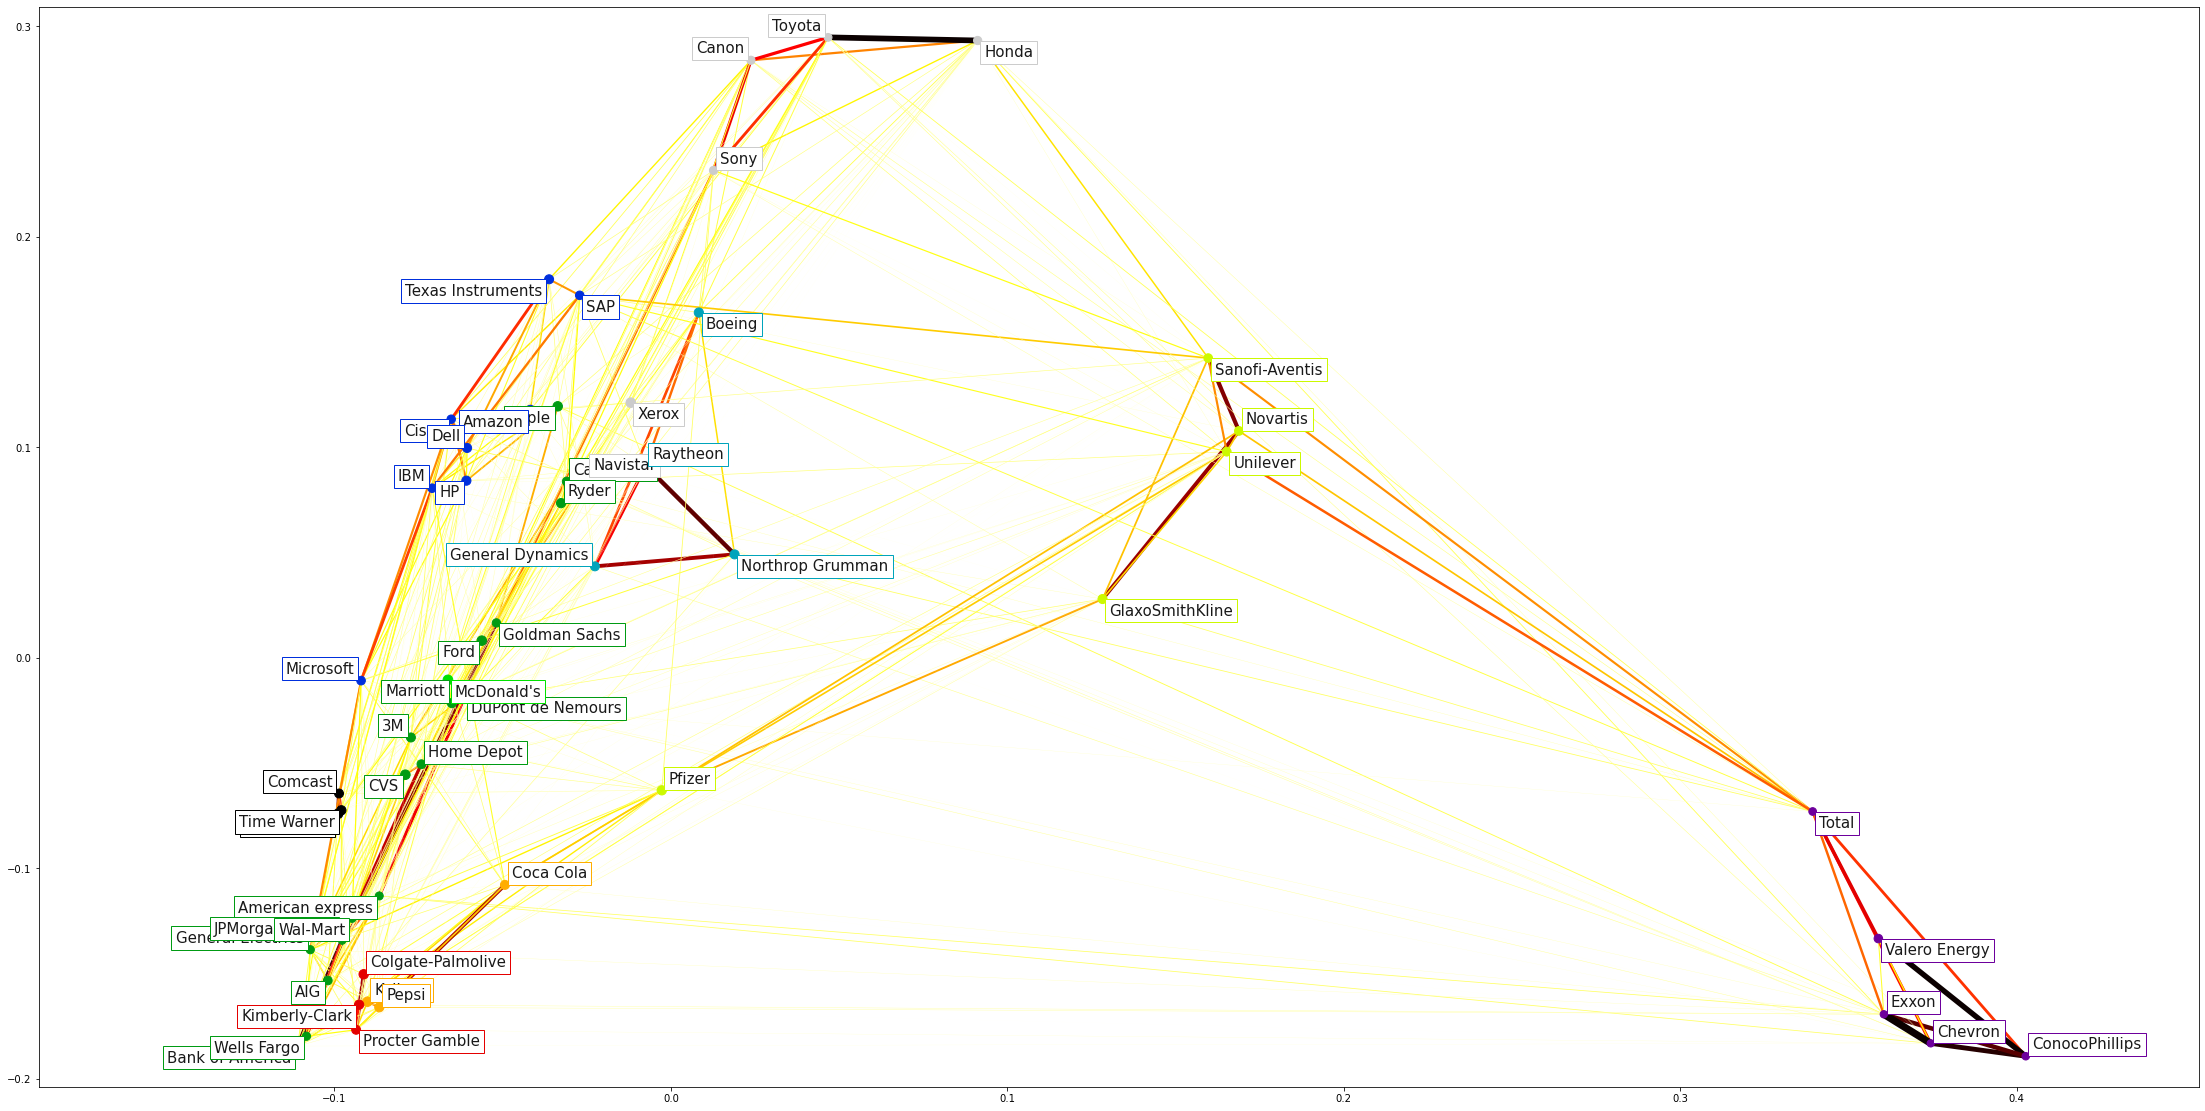

In [17]:
plt.figure(1, facecolor='w',figsize=(30,15))
plt.clf()
ax = plt.axes([0.,0.,1.,1.])
partial_corelations = edge_model.precision_.copy()
d = 1/np.sqrt(np.diag(partial_corelations))
partial_corelations *=d
partial_corelations *=d[:,np.newaxis]

non_zero = (np.abs(np.triu(partial_corelations,k=1))>0.002)

plt.scatter(embedding[0],embedding[1],s=100*d**2, c=labels,cmap=plt.cm.nipy_spectral)

star_idx, end_idx = np.where(non_zero) 
segments = [[embedding[:,start],embedding[:,stop]]
           for start, stop in zip(star_idx,end_idx)
           ]
values = np.abs(partial_corelations[non_zero])
lc = LineCollection(segments,
                   zorder=0, cmap=plt.cm.hot_r,
                   norm = plt.Normalize(0, .7*values.max()))
lc.set_array(values)
lc.set_linewidths(20 * values)
ax.add_collection(lc)

for index,(name,labels,(x,y)) in enumerate(
    zip(names,labels,embedding.T)):
    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dx[np.argmin(np.abs(dx))]
    
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + 0.002
    else:
        horizontalalignment = 'right'
        x = x - 0.002
    if this_dy >0:
        verticalalignment = 'bottom'
        y = y + 0.002
    else:
        verticalalignment = 'top'
        y = y - 0.002
    
    plt.text(x,y,name, size=15,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            bbox=dict(facecolor='w',
                     edgecolor=plt.cm.nipy_spectral(labels/float(n_labels))),
            alpha=.9)
    
plt.xlim(embedding[0].min() - .15*embedding[0].ptp(),
         embedding[0].max() + .10*embedding[0].ptp())
plt.ylim(embedding[1].min() - .03*embedding[1].ptp(),
         embedding[1].max() + .03*embedding[1].ptp())

plt.savefig("affinity_propagation_for_stock_market.png",dip=300)
plt.show()


        



In [18]:
print(labels)

9
